<img src = "https://upload.wikimedia.org/wikipedia/commons/e/e2/Confidence-interval.svg" width="540"/>

# Introducción a la probabilidad

## Contenido

1. Muestreo aleatorio simple, estratificado y sistemático de una población
2. Interpretación de probabilidad, funciones de densidad, funciones de variables aleatorias. Distribuciones exponenciales, gaussianas, normales-logarítmicas, chi-cuadrado ($\chi ^{2}$).
3. Valores esperados, funciones binomiales y multinomiales, distribución de Poisson, distribución uniforme.

In [1]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Clase 1: 06/23/2022

## Conceptos clave:

1. Población: El conjunto completo o "universo", en general no es posible tener acceso al conjunto.
2. Muestra: Un subconjunto incompleto, se requiere que sea representativa para extraer conclusiones sobre la población completa.
3. Estimadores estadísticos: Funciones matemáticas dependientes de la muestra.

## Ejemplo 1: Escoger entre dos cajas


In [2]:
data = np.array([1,2,2,1,1,1,1,2,2,1,1,2,2,2,1,2,2,2,1,2]) # Esta población es pequeña así que es igual a la muestra, pero  
len(data)                                                  # conceptualmente no son iguales.

20

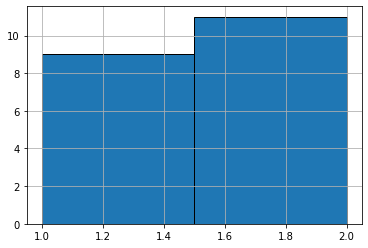

In [3]:
plt.hist(data, bins = 2, ec = 'k') # bins = cajas ; ec = 'edge color'
plt.grid()

La gráfica anterior es un [**histograma**](https://es.wikipedia.org/wiki/Histograma#Tipos_de_gráficos_relacionados_con_el_histograma) que representa la frecuencia absoluta por clase entre dos eventos, siendo el eje ordenado la frecuencia y el eje de abscizas las clases. En este caso la primera barra representa la frecuencia con la que fue escogida la caja 1, y la segunda barra representa la frecuencia con la que fue escogida la caja 2. En este experimento hubo sesgo por comentarios del experimentador y porque los participantes conocían las respuestas previas, incluso así las frecuencias de 1 y 2 son bastante cercanas.

## Muestreo

En poblaciones más grandes que no son accesibles, es necesario escoger muestras representativas para evitar sesgos y que las conclusiones extraídas de los datos sean lo más fiel posible a la realidad, para esto se utiliza el **muestreo**. estas son técnicas para escoger muestras representativas minimizando los sesgos, en todo muestreo hay posibilidad de sesgo y un margen de error. Hay  tipos de sesgos:

- Aleatorio
    - Simple
    - Estratificado
    
## Ejemplo 2: Muestreo ponderado de asistentes a un evento

In [4]:
url = 'https://raw.githubusercontent.com/asegura4488/Estadistica_Herramientas/main/Data/Sesion2/DatosEstratificados.csv'
df = pd.read_csv(url, sep = ',')
df

,Salon,Asistentes
0,Salon_A,40
1,Salon_B,100
2,Salon_C,95
3,Salon_D,70
4,Salon_E,510
5,Salon_F,200
6,Salon_G,150
7,Salon_H,125
8,Salon_I,310
9,Salon_J,400


In [5]:
# Extra: Suma total sin usar np.sum()
asistentes = df.Asistentes
suma = 0
for i in range(len(asistentes)):
    suma += asistentes[i]
suma

2000

In [8]:
Total = np.sum(asistentes)
Total

df2 = df.assign(Porcentaje = asistentes/Total) # Acá se asigna a cada clase el peso porcentual que tiene sobre el total

df3 = df2.assign(Encuestados = asistentes*df2.Porcentaje)
df3

,Salon,Asistentes,Porcentaje,Encuestados
0,Salon_A,40,0.0200,0.8000
1,Salon_B,100,0.0500,5.0000
2,Salon_C,95,0.0475,4.5125
3,Salon_D,70,0.0350,2.4500
4,Salon_E,510,0.2550,130.0500
5,Salon_F,200,0.1000,20.0000
6,Salon_G,150,0.0750,11.2500
7,Salon_H,125,0.0625,7.8125
8,Salon_I,310,0.1550,48.0500
9,Salon_J,400,0.2000,80.0000
